In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm 

[[62 62 62 ... 64 65 69]
 [62 62 62 ... 64 65 67]
 [62 62 62 ... 64 65 64]
 ...
 [42 44 44 ... 27 27 26]
 [43 44 45 ... 27 27 27]
 [42 43 44 ... 27 27 26]]


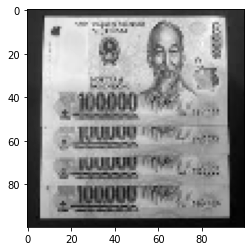

In [3]:
datadir = "/content/drive/MyDrive/TienVN"
categories=['100K','10K','1K','200K','200d','20K','2K','500K','500d','50K','5K']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [4]:
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 10/10 [00:02<00:00,  4.15it/s]

112


In [5]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('x',x.shape)
print('y',y.shape)

x (112, 100, 100, 1)
y (112,)


In [6]:
pickle_out=open("/content/drive/MyDrive/Pickle/TienVN/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/Pickle/TienVN/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [7]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [8]:
pickle_in = open("/content/drive/MyDrive/Pickle/TienVN/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Pickle/TienVN/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (112, 100, 100, 1)
y (112,)


In [10]:
y= to_categorical(y,11)

In [11]:
y.shape


(112, 11)

In [12]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))

In [13]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=150,batch_size=64,validation_split=0.2,verbose=1)

Epoch 1/150
2/2 [==============================] - 14s 2s/step - loss: 3.9043 - accuracy: 0.0000e+00 - val_loss: 4.3193 - val_accuracy: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 0s 102ms/step - loss: 3.1161 - accuracy: 0.1124 - val_loss: 2.4419 - val_accuracy: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 101ms/step - loss: 2.3994 - accuracy: 0.1236 - val_loss: 2.4582 - val_accuracy: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 105ms/step - loss: 2.3773 - accuracy: 0.1124 - val_loss: 2.5013 - val_accuracy: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 115ms/step - loss: 2.3610 - accuracy: 0.1124 - val_loss: 2.6035 - val_accuracy: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 0s 104ms/step - loss: 2.3392 - accuracy: 0.1124 - val_loss: 2.9219 - val_accuracy: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 0s 105ms/step - loss: 2.3148 - accuracy: 0.1124 - val_loss: 3.4318 - val_accu

In [14]:
model.save('TienVN.h5')

In [21]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: '100K',
          1: '10K',2: '1K',3:'200K',4:'200d',5:'20K',6:'2K',7:'500K',8:'500d',9:'50K'  ,10:'5K'  
          }
model = load_model('TienVN.h5')

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
expectation 20K


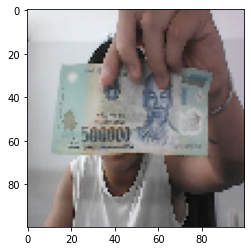

In [24]:
# load model
img = load_image('1 (1).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
expectation 2K


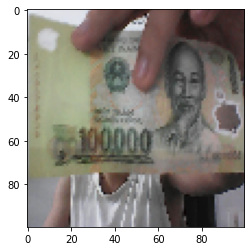

In [25]:
# load model
img = load_image('1 (2).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
expectation 500K


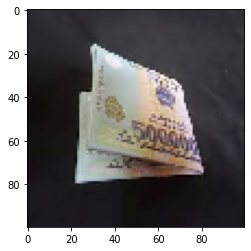

In [31]:
# load model
img = load_image('1 (8).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
expectation 500K


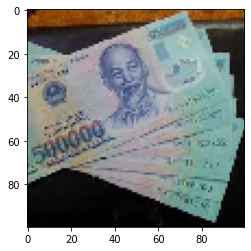

In [34]:
# load model
img = load_image('1 (11).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
expectation 200d


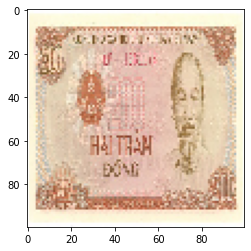

In [35]:
# load model
img = load_image('1 (12).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])